In [ ]:
%%capture
!pip install mediapipe
!pip install dlib

In [ ]:
from google.colab import files, drive
drive.mount('/content/gdrive')
uploaded = files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving Screenshot 2022-03-16 at 13.03.29.png to Screenshot 2022-03-16 at 13.03.29 (1).png


In [ ]:
uploaded

{'Screenshot 2022-03-16 at 13.03.29.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01X\x00\x00\x01~\x08\x06\x00\x00\x00\xc7\x99\x02k\x00\x00\n\xe2iCCPICC Profile\x00\x00H\x89\x95\x97\x07TS\xc9\x1a\x80\xe7\xde\x9bN\x02\x81\x04\x04\xa4\x84\xde\x04\xe9\x04\x90\x12z\x00\xa5WQ\tI \xa1\x84\x98\x10D\xec\xca\xe2\n\xae\x05\x11)*\n\xae\x8a(\xb8\xba\x02\xb2\x16\xc4\x82\x05QlX\xd0\x05Y\x14\x94u\xb1`Ce/\xf0\x08\xbb\xfb\xce{\xef\xbc?g2\xdf\xf9\xef?\x7f\x993s\xce?\x00P\x829bq:L\x05 C\x94%\t\xf7\xf7b\xc4\xc6\xc53\xf0\xcf\x00\x02\xb0\x80\n \xa0\xc3\xe1J\xc5\xac\xd0\xd0`\x80\xca\xd4\xfcwy\x7f\x0f\xb5C\xe5\xb6\xe5\xb8\xaf\x7f\xff\xfe_E\x85\xc7\x97r\x01\x80\x12PN\xe2I\xb9\x19(\xb7\xa0c\x98+\x96d\x01\x80\x1cE\xf5\x06K\xb2\xc4\xe3|\x07e\xba\x04M\x10\xe5\x81qN\x99\xe4/\xe3\x9c4\xc1\x18\xea\x84Md\xb87\xca\x86\x00\x10\xc8\x1c\x8e$\x05\x00\xb25\xaagdsSP?\xe4P\x94\xadE<\xa1\x08\xe5\xd5(\xbbs\x05\x1c\x1e\xcah\\0+##s\x9c\x87P6E\xed\xc5\x00P\xe8(3\x93\xfe\xe23\xe5o\xfe\x93\xe4\xfe9\x9c\x149O\xd65!\x04\x1f\xa1

Screenshot 2022-03-16 at 13.03.29.png


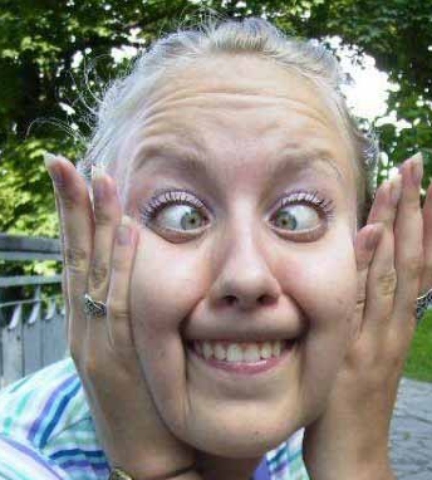

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

In [ ]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

#help(mp_face_mesh.FaceMesh)

In [ ]:
# Load drawing_utils and drawing_styles
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

Face landmarks of Screenshot 2022-03-16 at 13.03.29.png:


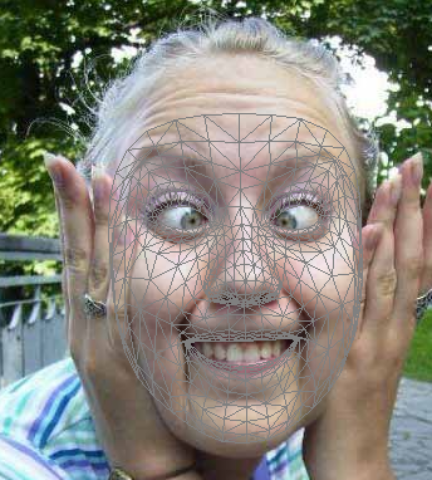

In [ ]:
# Run MediaPipe Face Mesh.
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face landmarks of each face.
    print(f'Face landmarks of {name}:')
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      # mp_drawing.draw_landmarks(
      #     image=annotated_image,
      #     landmark_list=face_landmarks,
      #     connections=mp_face_mesh.FACEMESH_CONTOURS,
      #     landmark_drawing_spec=None,
      #     connection_drawing_spec=mp_drawing_styles
      #     .get_default_face_mesh_contours_style())
      # mp_drawing.draw_landmarks(
      #     image=annotated_image,
      #     landmark_list=face_landmarks,
      #     connections=mp_face_mesh.FACEMESH_IRISES,
      #     landmark_drawing_spec=None,
      #     connection_drawing_spec=mp_drawing_styles
      #     .get_default_face_mesh_iris_connections_style())
    resize_and_show(annotated_image)

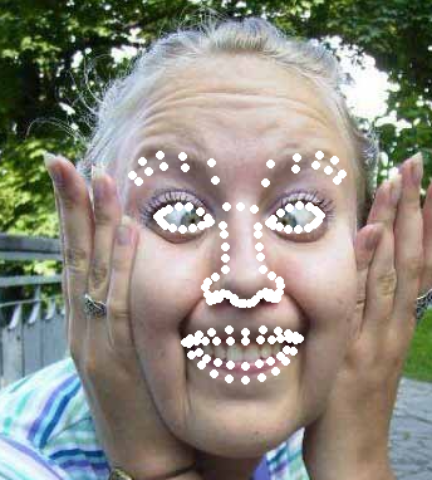

In [ ]:
drawing_spec = mp_drawing.DrawingSpec(thickness=0.1, circle_radius=0.1)

with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:

  for name, image in images.items():
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()

    le_landmarks_list = [33,7,163,144,145,153,154,155,133,173,157,158,159,160,161,246]
    for face_landmarks in results.multi_face_landmarks:
      # print('face_landmarks:', face_landmarks)
      # print(len(face_landmarks.landmark))
      # print(face_landmarks.landmark[7])
      for idx in le_landmarks_list:
        loc_x = int(face_landmarks.landmark[idx].x * image.shape[1])
        loc_y = int(face_landmarks.landmark[idx].y * image.shape[0])
        #print(loc_x, loc_y)
        cv2.circle(annotated_image,(loc_x, loc_y), 2, (255,255,255), 2)

    re_landmarks_list = [362,382,381,380,374,373,390,249,263,466,388,387,386,385,384,398]
    for face_landmarks in results.multi_face_landmarks:
      for idx in re_landmarks_list:
        loc_x = int(face_landmarks.landmark[idx].x * image.shape[1])
        loc_y = int(face_landmarks.landmark[idx].y * image.shape[0])
        cv2.circle(annotated_image,(loc_x, loc_y), 2, (255,255,255), 2)

    ol_landmarks_list = [61,185,40,39,37,0,267,269,270,409,291,375,321,405,314,17,84,181,91,146]
    for face_landmarks in results.multi_face_landmarks:
      for idx in ol_landmarks_list:
        loc_x = int(face_landmarks.landmark[idx].x * image.shape[1])
        loc_y = int(face_landmarks.landmark[idx].y * image.shape[0])
        cv2.circle(annotated_image,(loc_x, loc_y), 2, (255,255,255), 2)

    il_landmarks_list = [78,191,80,81,82,13,312,311,310,415,308,324,318,402,317,14,87,178,88,95]
    for face_landmarks in results.multi_face_landmarks:
      for idx in il_landmarks_list:
        loc_x = int(face_landmarks.landmark[idx].x * image.shape[1])
        loc_y = int(face_landmarks.landmark[idx].y * image.shape[0])
        cv2.circle(annotated_image,(loc_x, loc_y), 2, (255,255,255), 2)

    leb_landmarks_list = [70,63,105,66,107,55,65,52,53,46]
    for face_landmarks in results.multi_face_landmarks:
      for idx in leb_landmarks_list:
        loc_x = int(face_landmarks.landmark[idx].x * image.shape[1])
        loc_y = int(face_landmarks.landmark[idx].y * image.shape[0])
        cv2.circle(annotated_image,(loc_x, loc_y), 2, (255,255,255), 2)

    reb_landmarks_list = [300,293,334,296,336,285,295,282,283,276]
    for face_landmarks in results.multi_face_landmarks:
      for idx in reb_landmarks_list:
        loc_x = int(face_landmarks.landmark[idx].x * image.shape[1])
        loc_y = int(face_landmarks.landmark[idx].y * image.shape[0])
        cv2.circle(annotated_image,(loc_x, loc_y), 2, (255,255,255), 2)

    # no_landmarks_list = [300,293,334,296,336,285,295,282,283,276]
    # for face_landmarks in results.multi_face_landmarks:
    #   for idx in reb_landmarks_list:
    #     loc_x = int(face_landmarks.landmark[idx].x * image.shape[1])
    #     loc_y = int(face_landmarks.landmark[idx].y * image.shape[0])
    #     cv2.circle(annotated_image,(loc_x, loc_y), 2, (255,255,255), 2)

    no_landmarks_list = [168, 193, 245,188,174,236,134,131,49, 102, 64, 98, 240, 75, 59,166, 79, 239, 238, 20, 242, 141, 94, 370, 462, 250, 459, 309, 392, 289, 305, 460, 327,294,331,279,360,363,456,399,412,465,417, 168]
    for face_landmarks in results.multi_face_landmarks:
      for idx in no_landmarks_list:
        loc_x = int(face_landmarks.landmark[idx].x * image.shape[1])
        loc_y = int(face_landmarks.landmark[idx].y * image.shape[0])
        cv2.circle(annotated_image,(loc_x, loc_y), 2, (255,255,255), 2)


    # cv2_imshow(annotated_image)
    resize_and_show(annotated_image)

In [ ]:
whole_landmarks_list = []
whole_landmarks_list.extend(no_landmarks_list)
whole_landmarks_list.extend(reb_landmarks_list)
whole_landmarks_list.extend(leb_landmarks_list)
whole_landmarks_list.extend(il_landmarks_list)
whole_landmarks_list.extend(ol_landmarks_list)
whole_landmarks_list.extend(re_landmarks_list)
whole_landmarks_list.extend(le_landmarks_list)

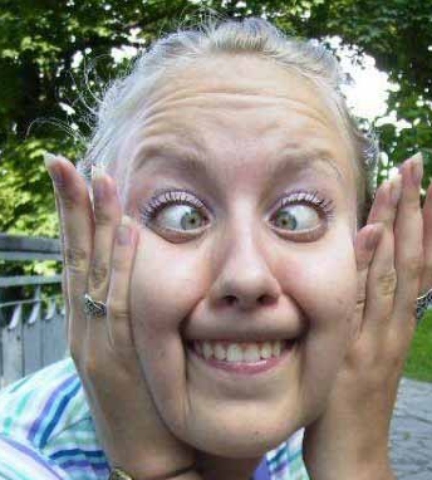

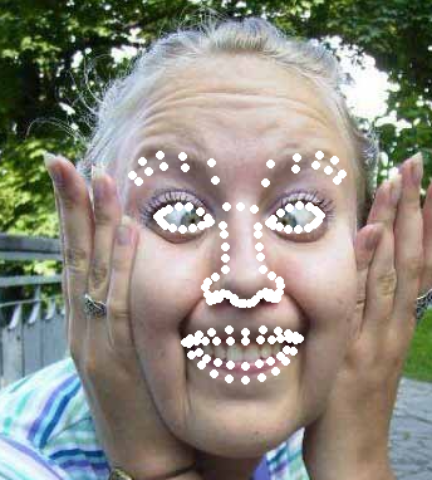

In [ ]:
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:

  for name, image in images.items():
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    resize_and_show(annotated_image)
    le_landmarks_list = [33,7,163,144,145,153,154,155,133,173,157,158,159,160,161,246]
    for face_landmarks in results.multi_face_landmarks:
      # print('face_landmarks:', face_landmarks)
      # print(len(face_landmarks.landmark))
      # print(face_landmarks.landmark[7])
      for idx in whole_landmarks_list:
        loc_x = int(face_landmarks.landmark[idx].x * image.shape[1])
        loc_y = int(face_landmarks.landmark[idx].y * image.shape[0])
        #print(loc_x, loc_y)
        cv2.circle(annotated_image,(loc_x, loc_y), 2, (255,255,255), 2)

    resize_and_show(annotated_image)

In [ ]:
for i in results.multi_face_landmarks[0].landmark:
    print(i, '\n----------------------')

'''
x : ~~
y : ~~
z : ~~
'''

In [ ]:
for i in results.multi_face_landmarks[0].landmark:
    print(i.x)

In [ ]:
extracted = [[i.x, i.y] for i in results.multi_face_landmarks[0].landmark]

In [ ]:
type(extracted)

list

In [ ]:
!wget -P /content/pretrained_dlib/ http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2022-03-22 10:34:22--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘/content/pretrained_dlib/shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  19.0MB/s    in 3.2s    

2022-03-22 10:34:26 (19.0 MB/s) - ‘/content/pretrained_dlib/shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:

!bzip2 -d /content/pretrained_dlib/shape_predictor_68_face_landmarks.dat.bz2

bzip2: Output file /content/pretrained_dlib/shape_predictor_68_face_landmarks.dat already exists.


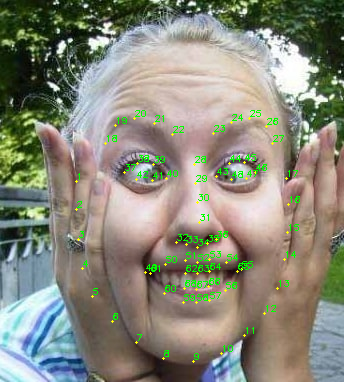

-1

In [ ]:
import sys
import os
import dlib
import glob

predictor_path = '/content/pretrained_dlib/shape_predictor_68_face_landmarks.dat'
image_file = '/content/gdrive/MyDrive/source_images/dlib_test.jpg'

detector = dlib.get_frontal_face_detector()
predictor  = dlib.shape_predictor(predictor_path)

image = cv2.imread(image_file)
# image = imutils.resize(image, width=500)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 1)
# print()
ALL = list(range(0, 68))
for (i, rect) in enumerate(rects):
    points = np.matrix([[p.x, p.y] for p in predictor(gray, rect).parts()])
    show_parts = points[ALL]
    for (i, point) in enumerate(show_parts):
        x = point[0,0]
        y = point[0,1]
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)
        cv2.putText(image, "{}".format(i + 1), (x, y - 2),
		cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)

cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
image = dlib.load_rgb_image(image_file)
rect = detector(image)[0]
sp = predictor(image, rect)
landmarks= np.array([[p.x, p.y] for p in sp.parts()])

In [ ]:
type(landmarks)

numpy.ndarray

In [ ]:
extracted = np.array(extracted)
type(extracted)

numpy.ndarray

In [ ]:
landmarks

array([[ 74, 183],
       [ 75, 211],
       [ 78, 240],
       [ 82, 269],
       [ 92, 297],
       [112, 322],
       [135, 342],
       [162, 357],
       [193, 362],
       [221, 355],
       [244, 336],
       [263, 314],
       [277, 287],
       [285, 259],
       [288, 231],
       [290, 203],
       [288, 176],
       [102, 144],
       [113, 127],
       [133, 119],
       [153, 123],
       [171, 133],
       [214, 134],
       [230, 123],
       [248, 119],
       [264, 126],
       [272, 142],
       [193, 163],
       [195, 182],
       [196, 201],
       [197, 221],
       [174, 241],
       [185, 244],
       [196, 247],
       [207, 243],
       [217, 239],
       [124, 172],
       [136, 163],
       [152, 164],
       [165, 176],
       [151, 178],
       [135, 177],
       [218, 175],
       [230, 163],
       [245, 161],
       [256, 171],
       [246, 176],
       [232, 177],
       [140, 268],
       [161, 262],
       [182, 259],
       [196, 261],
       [208,

In [ ]:
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(images):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)


In [ ]:
help(mp_face_mesh.FaceMesh)